# Part I: Research Question
## A.  Describe the purpose of this data mining report by doing the following:
### 1.  Propose one question relevant to a real-world organizational situation that you will answer by using principal component analysis (PCA).

A principal component analysis can provide valuable insight into the variance within a data set and which features have the most significant impact on that variance. This understanding reduces the number of dimensions of a data set, making further analysis more efficient.

For this analysis of the churn data set, can a PCA identify the number of features that account for the greatest variance in this data set and their relationships to continuous variables?

### 2.  Define one goal of the data analysis. Ensure that your goal is reasonable within the scope of the scenario and is represented in the available data.

Performing this principal component analysis will help identify the data set's principal components. This analysis aims to establish how many principal components to keep while still accounting for the largest amount of variance. 

# Part II: Method Justification

## B.  Explain the reasons for using PCA by doing the following:

### 1.  Explain how PCA analyzes the selected data set. Include expected outcomes.

A principal component analysis is a valuable tool in reducing the dimensions of a data set to allow for more efficient modeling and predictive functions to be performed.

Decorrelation is the first step of a PCA, which fits and transforms the data so that the samples align with the axes by rotating them and then shifting each so that they have a mean of zero. This transformation of the data removes any correlation between features of the data. With each sample aligned to its axes and shifted to a mean zero, variance and linear correlation can be measured with a Pearson correlation, measured between -1 and 1, with values near zero identified as having no linear correlation and larger values having strong linear correlation.

The direction of variance for each sample identifies the component, with the principal components having the most variance.
A successful PCA will have identified the principal components of the dataset and the amount of explained variance of each feature. The PCA can then be used to reduce the number of components of a dataset to just those with the highest explained variance.  

### 2.  Summarize one assumption of PCA.

PCA looks for variance within the features of the data. It assumes that low variance features can be removed as noise, while high variance features are more informative.


In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


%matplotlib inline

In [161]:
df = pd.read_csv('churn_clean.csv')

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [163]:
df.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,49153.319600,38.757567,-90.782536,9756.562400,2.0877,53.078400,39806.926771,10.001848,12.016000,...,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2886.89568,27532.196108,5.437389,15.156142,14432.698671,2.1472,20.698882,28199.916702,2.976019,3.025898,...,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,1.00000,601.000000,17.966120,-171.688150,0.000000,0.0000,18.000000,348.670000,0.099747,1.000000,...,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,26292.500000,35.341828,-97.082813,738.000000,0.0000,35.000000,19224.717500,8.018214,10.000000,...,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,48869.500000,39.395800,-87.918800,2910.500000,1.0000,53.000000,33170.605000,10.018560,12.000000,...,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,7500.25000,71866.500000,42.106908,-80.088745,13168.000000,3.0000,71.000000,53246.170000,11.969485,14.000000,...,200.734725,5586.141369,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.640660,-65.667850,111850.000000,10.0000,89.000000,258900.700000,21.207230,23.000000,...,290.160419,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [164]:
cont_df = df.select_dtypes(include=[np.number])
cont_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Zip                   10000 non-null  int64  
 2   Lat                   10000 non-null  float64
 3   Lng                   10000 non-null  float64
 4   Population            10000 non-null  int64  
 5   Children              10000 non-null  int64  
 6   Age                   10000 non-null  int64  
 7   Income                10000 non-null  float64
 8   Outage_sec_perweek    10000 non-null  float64
 9   Email                 10000 non-null  int64  
 10  Contacts              10000 non-null  int64  
 11  Yearly_equip_failure  10000 non-null  int64  
 12  Tenure                10000 non-null  float64
 13  MonthlyCharge         10000 non-null  float64
 14  Bandwidth_GB_Year     10000 non-null  float64
 15  Item1               

In [165]:
data = cont_df.drop(columns=['CaseOrder', 'Zip','Item1', 'Item2', 'Item3',
                             'Item4', 'Item5', 'Item6', 'Item7', 'Item8'])

In [166]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Lat                   10000 non-null  float64
 1   Lng                   10000 non-null  float64
 2   Population            10000 non-null  int64  
 3   Children              10000 non-null  int64  
 4   Age                   10000 non-null  int64  
 5   Income                10000 non-null  float64
 6   Outage_sec_perweek    10000 non-null  float64
 7   Email                 10000 non-null  int64  
 8   Contacts              10000 non-null  int64  
 9   Yearly_equip_failure  10000 non-null  int64  
 10  Tenure                10000 non-null  float64
 11  MonthlyCharge         10000 non-null  float64
 12  Bandwidth_GB_Year     10000 non-null  float64
dtypes: float64(7), int64(6)
memory usage: 1015.8 KB


In [167]:
data.columns

Index(['Lat', 'Lng', 'Population', 'Children', 'Age', 'Income',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year'],
      dtype='object')

In [184]:
data.describe()

,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
count,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,38.757567,-90.782536,9756.562400,2.0877,53.078400,39806.926771,10.001848,12.016000,0.994200,0.398000,34.526188,172.624816,3392.341550
std,5.437389,15.156142,14432.698671,2.1472,20.698882,28199.916702,2.976019,3.025898,0.988466,0.635953,26.443063,42.943094,2185.294852
min,17.966120,-171.688150,0.000000,0.0000,18.000000,348.670000,0.099747,1.000000,0.000000,0.000000,1.000259,79.978860,155.506715
25%,35.341828,-97.082813,738.000000,0.0000,35.000000,19224.717500,8.018214,10.000000,0.000000,0.000000,7.917694,139.979239,1236.470827
50%,39.395800,-87.918800,2910.500000,1.0000,53.000000,33170.605000,10.018560,12.000000,1.000000,0.000000,35.430507,167.484700,3279.536903
75%,42.106908,-80.088745,13168.000000,3.0000,71.000000,53246.170000,11.969485,14.000000,2.000000,1.000000,61.479795,200.734725,5586.141369
max,70.640660,-65.667850,111850.000000,10.0000,89.000000,258900.700000,21.207230,23.000000,7.000000,6.000000,71.999280,290.160419,7158.981530


### 1.  Identify the continuous dataset variables that you will need in order to answer the PCA question proposed in part A1.

This dataset has 50 variables with 23 numerical variables.

Of the 23 numerical variables, the following are numerical but not continuous variables and can be excluded:
* CaseOrder
* Zip
* Item1
* Item2
* Item3
* Item4
* Item5
* Item6
* Item7
* Item8 

The remaining 13 variables are continuous and can be used in the PCA. These include:
* Lat
* Lng
* Population
* Children
* Age
* Income
* Outage_sec_perweek
* Email
* Contacts
* Yearly_equip_failure
* Tenure
* MonthlyCharge
* Bandwidth_GB_Year


### 2.  Standardize the continuous dataset variables identified in part C1. Include a copy of the cleaned dataset.

In [200]:
scaler = StandardScaler()
scaled = scaler.fit_transform(data)

In [201]:
data.to_csv("selected_variables_D212_Task2.csv")
pd.DataFrame(scaled).to_csv("scaled_and_transformed_data_D212_Task2.csv")

# Part IV: Analysis

## D.  Perform PCA by doing the following:

### 1.  Determine the matrix of all the principal components.


In [202]:
pca = PCA()
transformed = pca.fit_transform(scaled)

In [203]:
cols = []
i=1

while i <= len(pca.components_):
    cols.append("PC " + str(i))
    i = i + 1
    
loadings = pd.DataFrame(pca.components_, columns = cols, index=data.columns)
loadings

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,PC 11,PC 12,PC 13
Lat,-0.023161,0.007911,-0.001230,0.014244,0.001860,0.004185,0.005811,-0.020020,0.004283,0.017665,0.705211,0.040456,0.706719
Lng,-0.714010,0.180879,0.653439,-0.014267,0.052795,-0.054602,0.009174,0.152355,0.031043,-0.007070,-0.008913,-0.004500,-0.010435
Population,-0.031715,-0.285753,0.151916,0.447882,-0.443537,0.195742,-0.249550,-0.092711,-0.447906,0.153686,0.006569,-0.404228,0.008289
Children,0.109414,-0.736871,0.322012,-0.464670,0.227235,-0.041772,-0.126214,-0.144998,0.108875,0.063449,0.026652,-0.136041,-0.002713
Age,-0.094872,0.344620,-0.119517,-0.107498,0.436759,0.312779,-0.455981,-0.353186,0.011245,0.420468,0.009197,-0.218356,-0.021522
Income,-0.030887,-0.087695,0.098791,0.130597,-0.096321,0.100371,0.597523,-0.403463,0.082442,0.592380,-0.036725,0.257205,-0.012558
Outage_sec_perweek,-0.010719,-0.052349,0.053682,0.034812,-0.188399,0.773549,0.051915,0.003835,0.519791,-0.290766,-0.002190,-0.041495,0.003902
Email,-0.020375,-0.086499,0.079161,-0.065531,0.093484,0.335467,-0.184658,-0.125375,-0.510974,-0.194665,-0.038433,0.714123,0.002926
Contacts,0.090273,-0.172285,-0.027392,0.192459,0.342892,0.246663,0.057056,0.760622,-0.052695,0.397088,0.003806,0.060669,0.002798
Yearly_equip_failure,0.018619,-0.151301,0.055304,0.437471,-0.083596,-0.275852,-0.515406,-0.052146,0.494601,0.143419,-0.037339,0.405280,0.005673


### 2.  Identify the total number of principal components using the elbow rule or the Kaiser criterion. Include a screenshot of the scree plot.

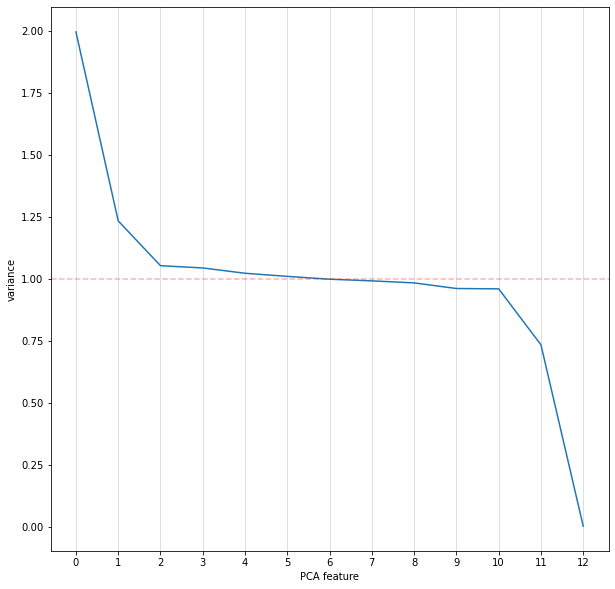

In [204]:
plt.figure(figsize=(10,10))

features = range(pca.n_components_)
plt.plot(features, pca.explained_variance_)
plt.grid(axis='x',alpha=.5)
plt.axhline(y=1, color='r', linestyle='--',alpha=.3)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show();

In [205]:
variance = pd.DataFrame(pca.explained_variance_, columns = ['Explained Variance'], index=cols)
variance['Ratio'] = pca.explained_variance_ratio_
variance['Ratio Percentage'] = (variance['Ratio']*100).round(2).astype(str) + '%'
variance['Ratio Cumulative Sum'] = pca.explained_variance_ratio_.cumsum()
variance['Ratio Cumulative Sum Percentage'] = (variance['Ratio Cumulative Sum']*100).round(2).astype(str) + '%'
variance

,Explained Variance,Ratio,Ratio Percentage,Ratio Cumulative Sum,Ratio Cumulative Sum Percentage
PC 1,1.994905,0.153439,15.34%,0.153439,15.34%
PC 2,1.234151,0.094925,9.49%,0.248364,24.84%
PC 3,1.053770,0.081051,8.11%,0.329415,32.94%
PC 4,1.044695,0.080353,8.04%,0.409768,40.98%
PC 5,1.023288,0.078707,7.87%,0.488475,48.85%
PC 6,1.010782,0.077745,7.77%,0.566220,56.62%
PC 7,0.999303,0.076862,7.69%,0.643081,64.31%
PC 8,0.992675,0.076352,7.64%,0.719433,71.94%
PC 9,0.984531,0.075726,7.57%,0.795159,79.52%
PC 10,0.961886,0.073984,7.4%,0.869143,86.91%


### 2.  Identify the total number of principal components using the elbow rule or the Kaiser criterion. Include a screenshot of the scree plot.

Using the Kaiser Criterion, principal components with an explained variance over 1.0 can be selected for the PCA. This would include the first 6 Principal Components.

In [228]:
scaler = StandardScaler()
pca = PCA(n_components=6)
pipeline = make_pipeline(scaler, pca)
transformed = pipeline.fit_transform(data)

In [234]:
print(pca.explained_variance_)

[1.99490495 1.23415146 1.05376978 1.04469451 1.02328808 1.01078182]


In [235]:
print(pca.explained_variance_ratio_)

[0.15343888 0.09492523 0.08105111 0.08035308 0.0787066  0.07774467]


In [236]:
print(pca.explained_variance_ratio_.cumsum())

[0.15343888 0.24836412 0.32941522 0.4097683  0.4884749  0.56621957]


### 3.  Identify the variance of each of the principal components identified in part D2.

In [238]:
cols = []
i=1

while i <= len(pca.components_):
    cols.append("PC " + str(i))
    i = i + 1

variance = pd.DataFrame(pca.explained_variance_, columns = ['Explained Variance'], index=cols)
variance['Ratio'] = pca.explained_variance_ratio_
variance['Percentage'] = (variance['Ratio']*100).round(2).astype(str) + '%'
variance['Ratio Cumulative Sum'] = pca.explained_variance_ratio_.cumsum()
variance['Ratio Cumulative Sum Percentage'] = (variance['Ratio Cumulative Sum']*100).round(2).astype(str) + '%'
variance

,Explained Variance,Ratio,Percentage,Ratio Cumulative Sum,Ratio Cumulative Sum Percentage
PC 1,1.994905,0.153439,15.34%,0.153439,15.34%
PC 2,1.234151,0.094925,9.49%,0.248364,24.84%
PC 3,1.053770,0.081051,8.11%,0.329415,32.94%
PC 4,1.044695,0.080353,8.04%,0.409768,40.98%
PC 5,1.023288,0.078707,7.87%,0.488475,48.85%
PC 6,1.010782,0.077745,7.77%,0.566220,56.62%


### 4.  Identify the total variance captured by the principal components identified in part D2.

In [241]:
print('The total variance for the identified 6 Principal Compenents is: ', variance['Explained Variance'].sum())
print('The total ratio of explained varience of the identified 6 Principal Compenents is: ', variance['Ratio'].sum().round(4))
print('Or as a percentage: ', (variance['Ratio']*100).sum().round(2).astype(str) + '%')

The total variance for the identified 6 Principal Compenents is:  7.361590597900971
The total ratio of explained varience of the identified 6 Principal Compenents is:  0.5662
Or as a percentage:  56.62%


In [226]:
loadings = pd.DataFrame(pca.components_.T, columns = cols, index=data.columns)
loadings

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6
Lat,-0.023161,-0.714010,-0.031715,0.109414,-0.094872,-0.030887
Lng,0.007911,0.180879,-0.285753,-0.736871,0.344620,-0.087695
Population,-0.001230,0.653439,0.151916,0.322012,-0.119517,0.098791
Children,0.014244,-0.014267,0.447882,-0.464670,-0.107498,0.130597
Age,0.001860,0.052795,-0.443537,0.227235,0.436759,-0.096321
Income,0.004185,-0.054602,0.195742,-0.041772,0.312779,0.100371
Outage_sec_perweek,0.005811,0.009174,-0.249550,-0.126214,-0.455981,0.597523
Email,-0.020020,0.152355,-0.092711,-0.144998,-0.353186,-0.403463
Contacts,0.004283,0.031043,-0.447906,0.108875,0.011245,0.082442
Yearly_equip_failure,0.017665,-0.007070,0.153686,0.063449,0.420468,0.592380


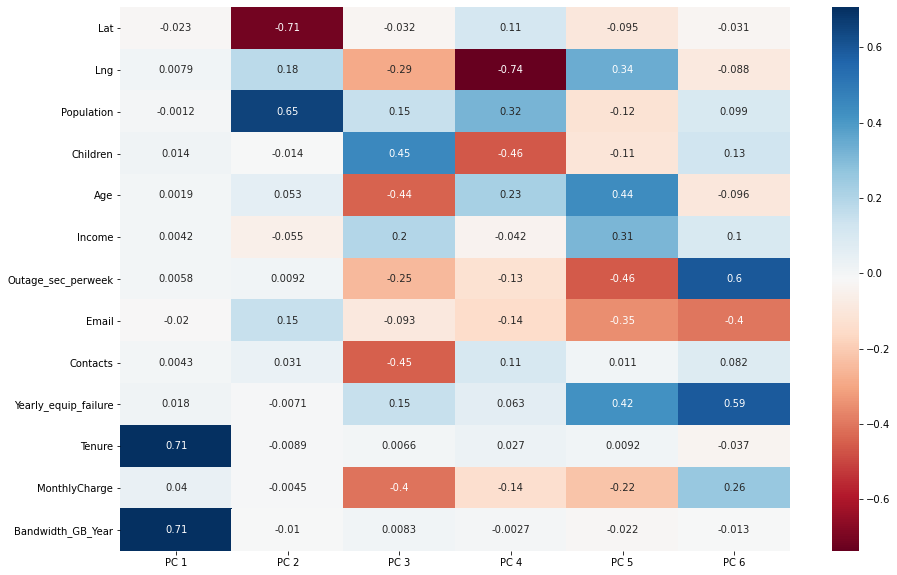

In [227]:
plt.figure(figsize=(15,10))
sns.heatmap(loadings, cmap ='RdBu', annot = True);

In [264]:
print(df.shape)
print(transformed.shape)
print((((1 - (transformed.size/df.size).round(2))*100).astype(str) + '%'))


(10000, 50)
(10000, 6)
88.0%


### 5.  Summarize the results of your data analysis.
 This PCA has successfully reduced the dimensions of this data. The original dataset was comprised of 50 variables from 10,000 samples. The result of the PCA reduced that dataset to 6 principal components, an 88% reduction in the size of the data.
 
The six components accounted for 56.62% of the explained variance.

Principal Components 1 and 2 accounted for the largest of the explained variance of 24.84% between the two. Of the original variables in the dataset, Tenure and Bandwidth_GB_Year had the strongest correlation to PC1, while PC 2 had the strongest correlations to Lat and population.


# Part V: Attachments

## E.  Record the web sources used to acquire data or segments of third-party code to support the analysis. Ensure the web sources are reliable.

Centellegher, Simone, PhD – How to compute PCA loadings and the loading matrix with scikit-learn. Data scientist and Researcher. (2020, January 27). Retrieved June 10, 2022, from https://scentellegher.github.io/machine-learning/2020/01/27/pca-loadings-sklearn.html

## F.  Acknowledge sources, using in-text citations and references, for content that is quoted, paraphrased, or summarized.

 “D212 – Data Mining II” Datacamp, April-Mary 2022, https://app.datacamp.com/learn/custom-tracks/custom-data-mining-ii
 
Brems, M. (2022, January 26). A one-stop shop for principal component analysis. Medium. Retrieved June 10, 2022, from https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c 

## G.  Demonstrate professional communication in the content and presentation of your submission.